## data visualization

#### import packages

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('datacleaned.csv')
data.shape

(7339, 21)

In [3]:
data.head(5)

,Unnamed: 0,title,movie_id,overview,release_date,genres,budget,original_language,original_title,popularity,production_companies,production_countries,runtime,spoken_languages,status,vote_average,vote_count,keywords,cast,crew,revenue
0,7,Four Rooms,5,It's Ted the Bellhop's first night on the job....,1995-12-09,"Crime,Comedy",4000000,en,Four Rooms,13.497,"Miramax,A Band Apart",United States of America,98.0,English,Released,5.7,2029,"hotel,new year's eve,witch,bet,hotel room,sper...",TimRoth,"AllisonAnders,AlexandreRockwell,RobertRodrigue...",4257354
1,8,Judgment Night,6,"While racing to a boxing match, Frank, Mike, J...",1993-10-15,"Action,Thriller,Crime",21000000,en,Judgment Night,8.104,"Universal Pictures,Largo Entertainment,JVC","Japan,United States of America",110.0,English,Released,6.5,214,"chicago, illinois,drug dealer,escape,one night...",EmilioEstevez,StephenHopkins,12136938
2,12,Finding Nemo,12,"Nemo, an adventurous young clownfish, is unexp...",2003-05-30,"Animation,Family",94000000,en,Finding Nemo,98.136,Pixar,United States of America,100.0,English,Released,7.8,15611,"parent child relationship,sydney, australia,ha...",AlbertBrooks,AndrewStanton,940335536
3,13,Forrest Gump,13,A man with a low IQ has accomplished great thi...,1994-07-06,"Comedy,Drama,Romance",55000000,en,Forrest Gump,48.527,"Paramount,The Steve Tisch Company",United States of America,142.0,English,Released,8.5,21518,"vietnam veteran,hippie,washington dc, usa,ment...",TomHanks,RobertZemeckis,677387716
4,14,American Beauty,14,"Lester Burnham, a depressed suburban father in...",1999-09-15,Drama,15000000,en,American Beauty,25.042,"Jinks/Cohen Company,DreamWorks Pictures",United States of America,122.0,English,Released,8.0,9734,"adultery,parent child relationship,midlife cri...",KevinSpacey,SamMendes,356296601


#### drop unnecessary column and set movie_id as index

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data = data.set_index('movie_id')

### column: release date

In [6]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [7]:
data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month

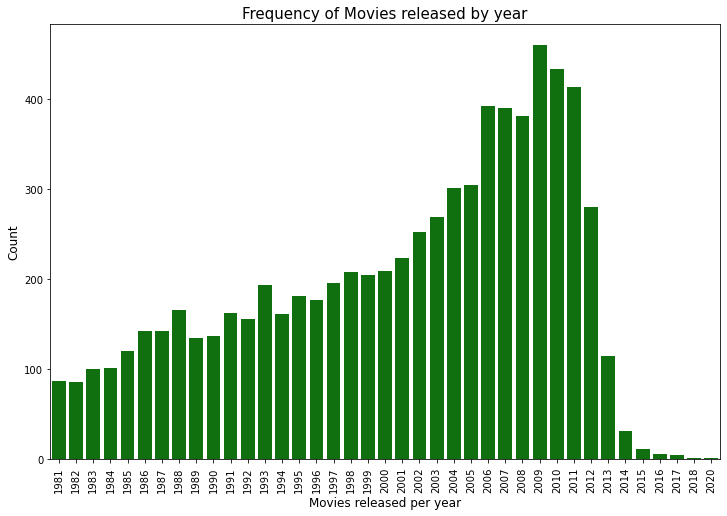

In [8]:
# year plot

plt.figure(figsize=(12,8))
sns.countplot(x='release_year', data=data, color='green')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Movies released per year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Movies released by year", fontsize=15)
plt.show()

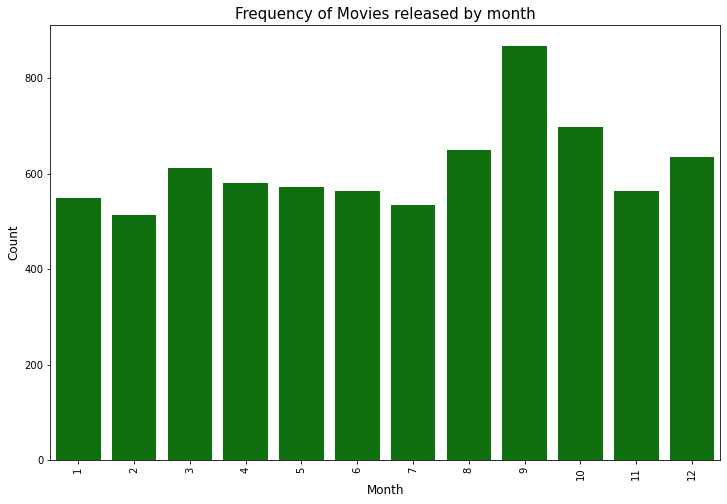

In [9]:
# month plot

plt.figure(figsize=(12,8))
sns.countplot(x='release_month', data=data, color='green')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Movies released by month", fontsize=15)
plt.show()


## numericals: exploration

In [10]:
numericals = data.select_dtypes(np.number)
numericals.drop(['release_year','release_month'],axis=1,inplace=True)
numericals.head(5)

,budget,popularity,runtime,vote_average,vote_count,revenue
movie_id,,,,,,
5,4000000,13.497,98.0,5.7,2029,4257354
6,21000000,8.104,110.0,6.5,214,12136938
12,94000000,98.136,100.0,7.8,15611,940335536
13,55000000,48.527,142.0,8.5,21518,677387716
14,15000000,25.042,122.0,8.0,9734,356296601


In [11]:
def numericals_distribution(data):
    for column in numericals.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14,4))
        sns.distplot(numericals[column],ax=axes[0],color='green')
        plt.ylabel('')
        sns.boxplot(numericals[column], ax=axes[1],color='orange')
        plt.ylabel('')        
        sns.set(font_scale=1.15)
        print(' \n','Column:',column)
        plt.show()

 
 Column: budget


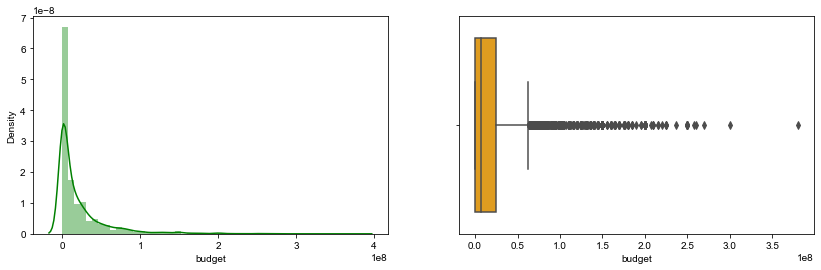

 
 Column: popularity


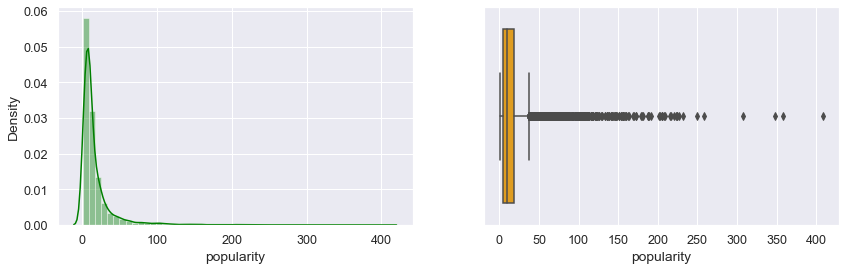

 
 Column: runtime


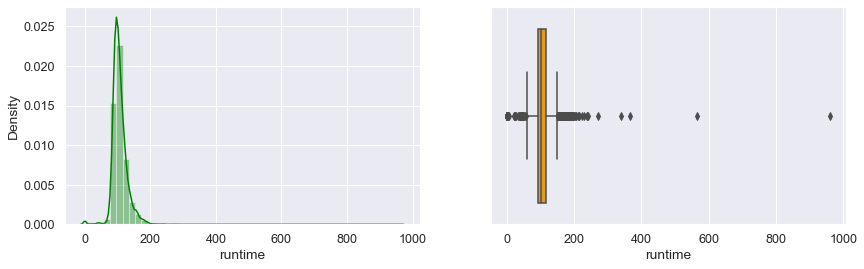

 
 Column: vote_average


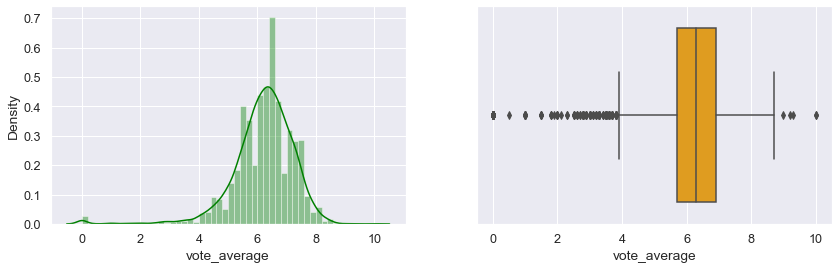

 
 Column: vote_count


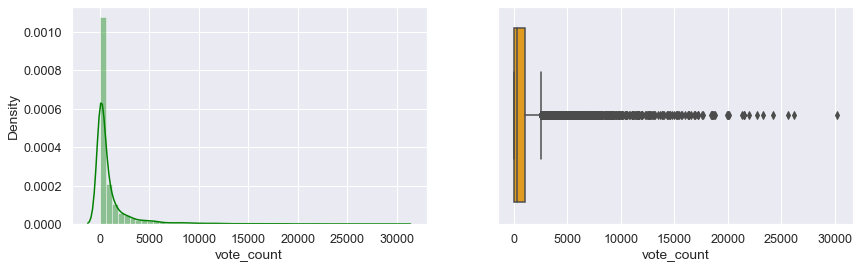

 
 Column: revenue


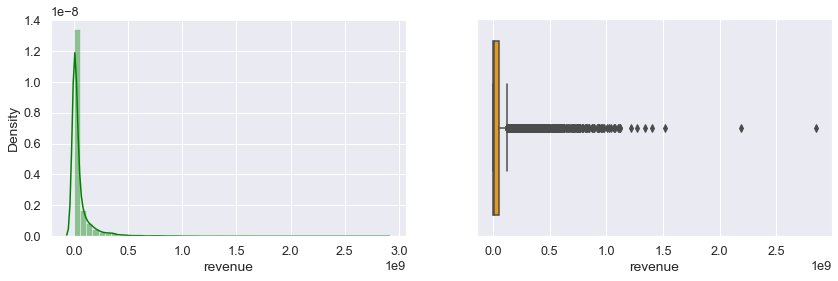

In [12]:
numericals_distribution(data)

#### check correlations

In [13]:
data_corr = numericals.corr()
data_corr

,budget,popularity,runtime,vote_average,vote_count,revenue
budget,1.000000,0.556055,0.183840,0.106230,0.619318,0.743670
popularity,0.556055,1.000000,0.074537,0.191410,0.655225,0.634303
runtime,0.183840,0.074537,1.000000,0.250468,0.174964,0.177809
vote_average,0.106230,0.191410,0.250468,1.000000,0.317703,0.201962
vote_count,0.619318,0.655225,0.174964,0.317703,1.000000,0.795370
revenue,0.743670,0.634303,0.177809,0.201962,0.795370,1.000000


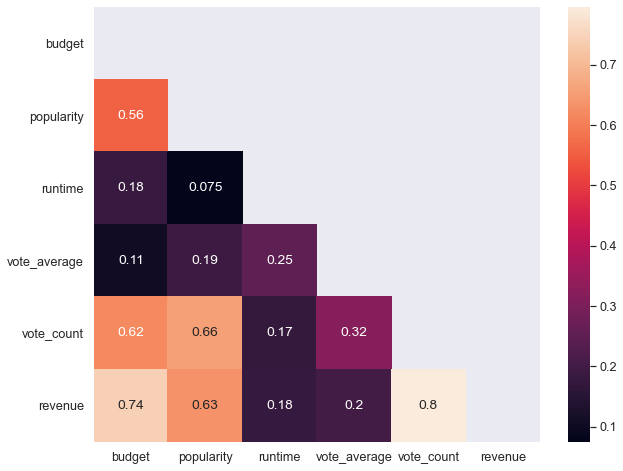

In [14]:
mask = np.zeros_like(numericals.corr())

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numericals.corr(), mask=mask, annot=True)
plt.show()

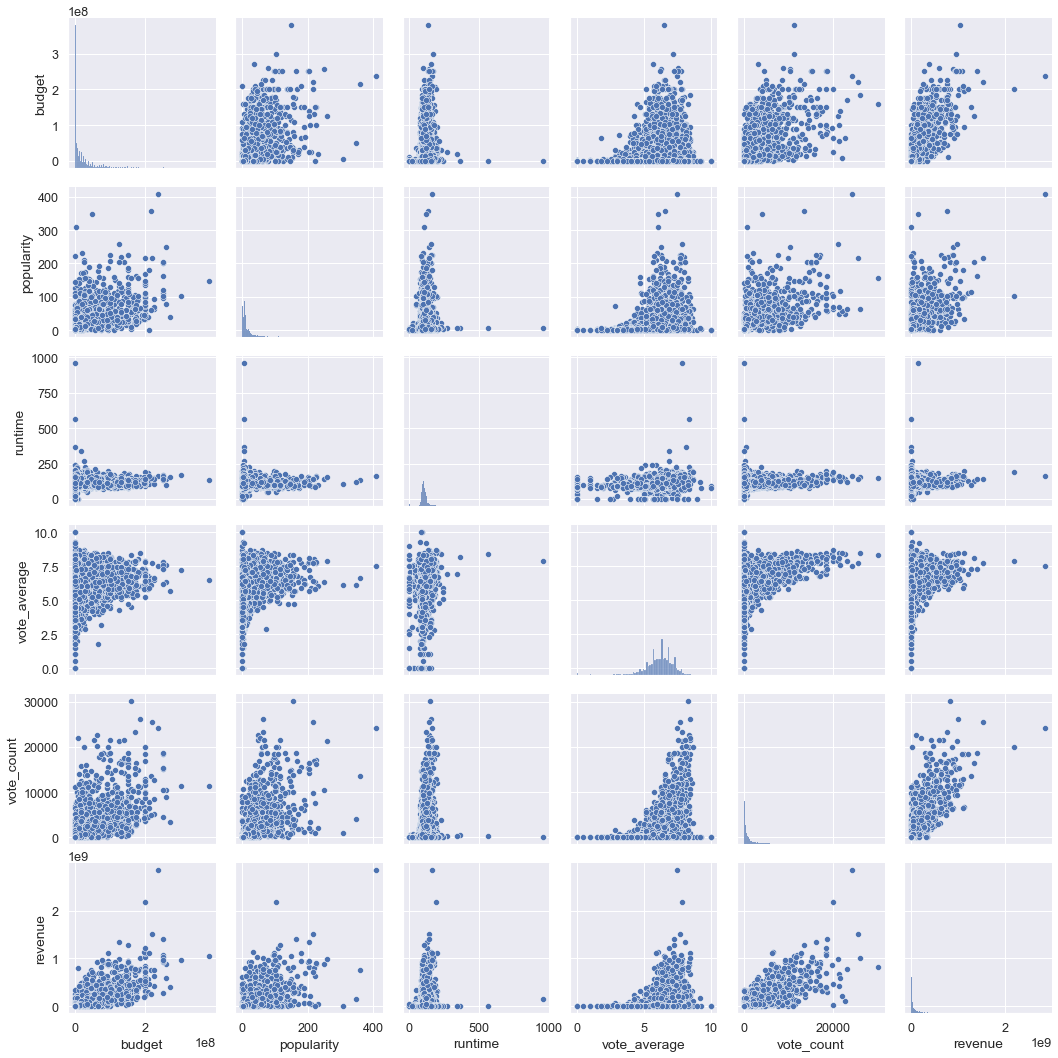

In [15]:
sns.pairplot(numericals)

## 
## categoricals: exploration

In [16]:
categoricals = data.select_dtypes(object)
categoricals.head()

,title,overview,genres,original_language,original_title,production_companies,production_countries,spoken_languages,status,keywords,cast,crew
movie_id,,,,,,,,,,,,
5,Four Rooms,It's Ted the Bellhop's first night on the job....,"Crime,Comedy",en,Four Rooms,"Miramax,A Band Apart",United States of America,English,Released,"hotel,new year's eve,witch,bet,hotel room,sper...",TimRoth,"AllisonAnders,AlexandreRockwell,RobertRodrigue..."
6,Judgment Night,"While racing to a boxing match, Frank, Mike, J...","Action,Thriller,Crime",en,Judgment Night,"Universal Pictures,Largo Entertainment,JVC","Japan,United States of America",English,Released,"chicago, illinois,drug dealer,escape,one night...",EmilioEstevez,StephenHopkins
12,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...","Animation,Family",en,Finding Nemo,Pixar,United States of America,English,Released,"parent child relationship,sydney, australia,ha...",AlbertBrooks,AndrewStanton
13,Forrest Gump,A man with a low IQ has accomplished great thi...,"Comedy,Drama,Romance",en,Forrest Gump,"Paramount,The Steve Tisch Company",United States of America,English,Released,"vietnam veteran,hippie,washington dc, usa,ment...",TomHanks,RobertZemeckis
14,American Beauty,"Lester Burnham, a depressed suburban father in...",Drama,en,American Beauty,"Jinks/Cohen Company,DreamWorks Pictures",United States of America,English,Released,"adultery,parent child relationship,midlife cri...",KevinSpacey,SamMendes


In [17]:
categoricals.drop(['original_title','status'], axis=1, inplace=True)

In [18]:
#def distribution(data):
#    for column in categoricals.columns:
#        column = categoricals.set_index('title')[column].str.split(',').explode().rename(column).reset_index()

In [19]:
#distribution(data)

In [20]:
#spoken_languages

### column: spoken languages

In [21]:
spoken_languages = categoricals.set_index('title')['spoken_languages'].str.split(',').explode().rename('spoken_languages').reset_index()

In [22]:
spoken_languages = spoken_languages.groupby('spoken_languages')['title'].nunique().sort_values(ascending=False)[:6].sort_values(ascending=True).dropna()

In [23]:
spoken_languages = pd.DataFrame(spoken_languages).rename(columns={"title": "count"}).reset_index()

Text(0.5, 1.0, 'Spoken languages in films')

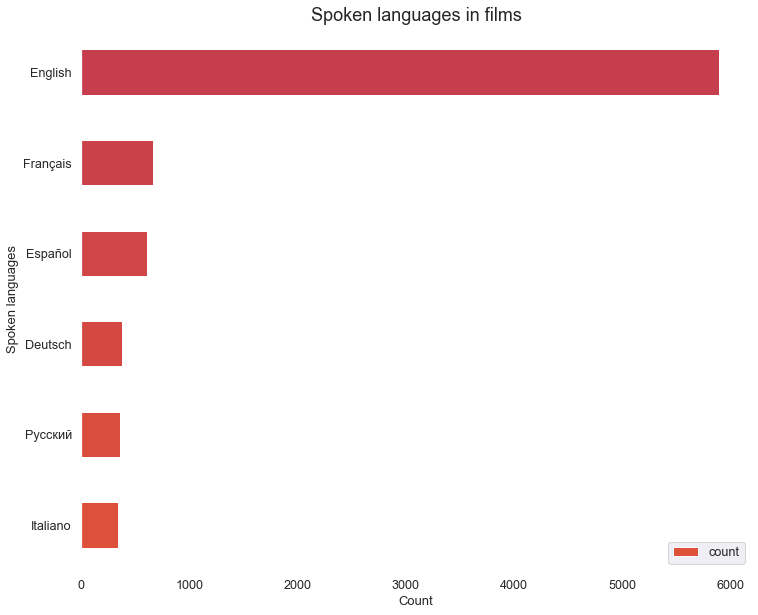

In [24]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

spoken_languages.plot(figsize=(12, 10),kind='barh',x='spoken_languages',y='count', color=color).set_facecolor('white')
plt.ylabel('Spoken languages', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Spoken languages in films", fontsize=18)

### column: production countries

In [25]:
production_countries = categoricals.set_index('title')['production_countries'].str.split(',').explode().rename('production_countries').reset_index()

In [26]:
production_countries['production_countries'] = production_countries['production_countries'].dropna()

In [27]:
production_countries = production_countries.groupby('production_countries')['title'].nunique().sort_values(ascending=False)[:6].sort_values(ascending=True)

In [28]:
production_countries = pd.DataFrame(production_countries).rename(columns={"title": "count"}).reset_index()

Text(0.5, 1.0, 'Original languages in films')

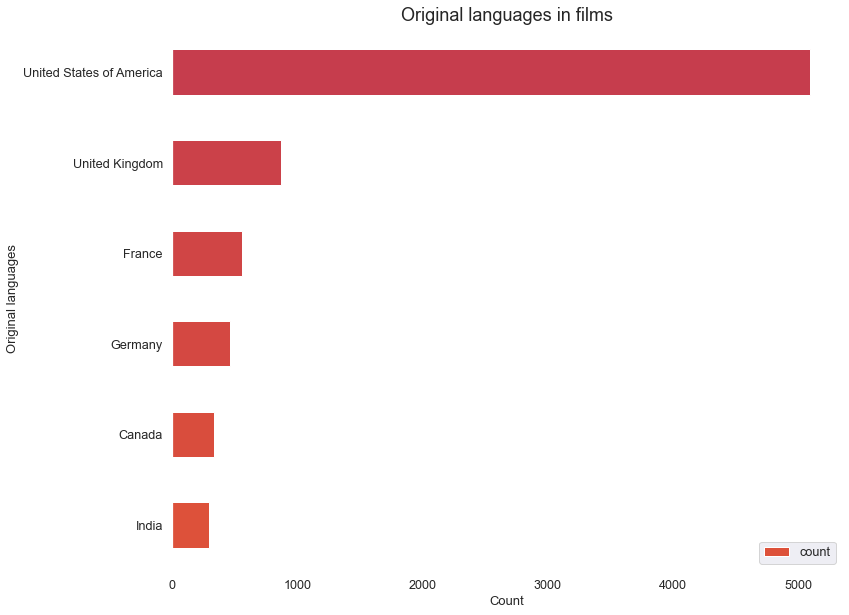

In [29]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

production_countries.plot(figsize=(12, 10),kind='barh',x='production_countries',y='count', color=color).set_facecolor('white')
plt.ylabel('Original languages', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Original languages in films", fontsize=18)

### column: original languages

In [30]:
original_language = categoricals.set_index('title')['original_language'].str.split(',').explode().rename('original_language').reset_index()

In [31]:
original_language = original_language.groupby('original_language')['title'].nunique().sort_values(ascending=False)[:6].sort_values(ascending=True).dropna()

In [32]:
original_language = pd.DataFrame(original_language).rename(columns={"title": "count"}).reset_index()

Text(0.5, 1.0, 'Original languages in films')

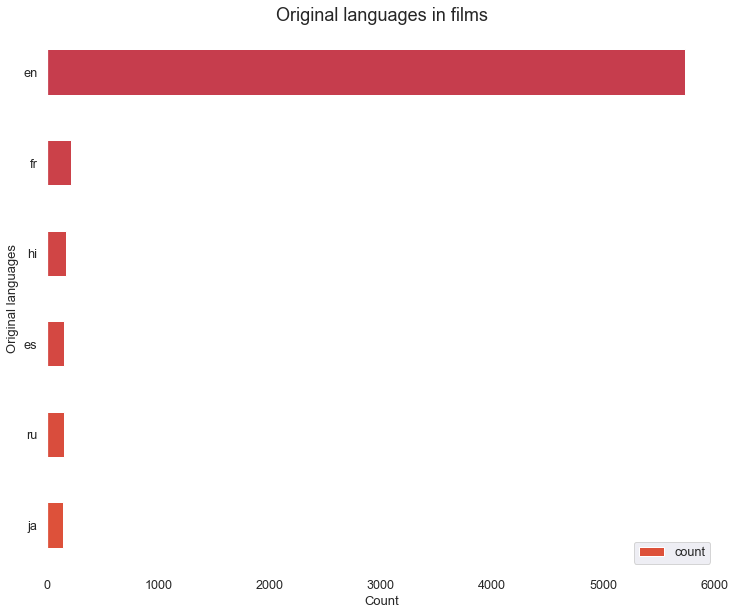

In [33]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

original_language.plot(figsize=(12, 10),kind='barh',x='original_language',y='count', color=color).set_facecolor('white')
plt.ylabel('Original languages', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Original languages in films", fontsize=18)

### column: cast

In [34]:
cast = categoricals.groupby('cast')['title'].nunique().sort_values(ascending=False)[:20].sort_values(ascending=True)

In [35]:
cast = pd.DataFrame(cast).rename(columns={"title": "movietotal"}).reset_index()

Text(0.5, 1.0, 'Frequency of Movies released by popular cast')

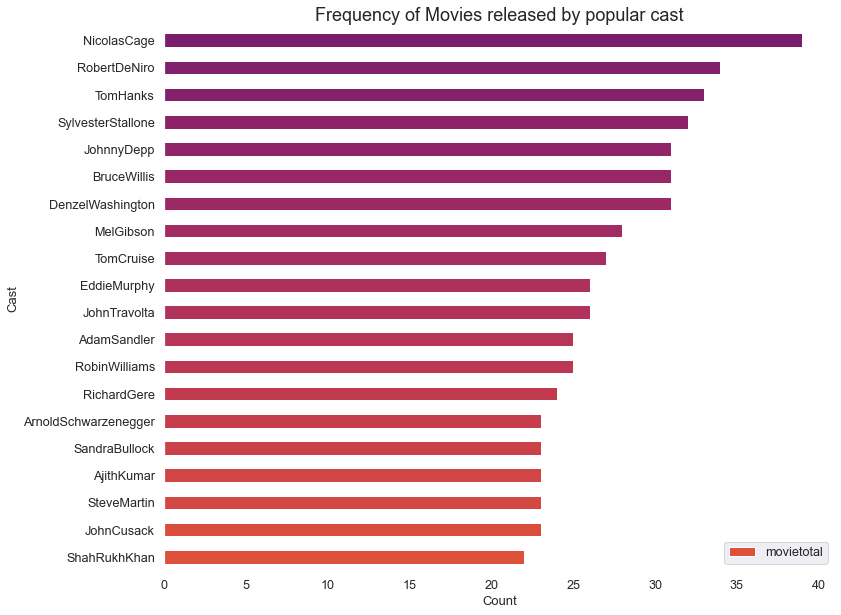

In [36]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

cast.plot(figsize=(12, 10),kind='barh',x='cast',y='movietotal', color=color).set_facecolor('white')
plt.ylabel('Cast', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Frequency of Movies released by popular cast", fontsize=18)

### column: genres

In [37]:
genrestotal = categoricals.set_index('title')['genres'].str.split(',').explode().rename('genre').reset_index()

In [38]:
genrestotal = genrestotal.groupby('genre')['title'].nunique().sort_values(ascending=True)

In [39]:
genrestotal = pd.DataFrame(genrestotal).rename(columns={"title": "count"}).reset_index()

In [40]:
genrestotal

,genre,count
0,TV Movie,12
1,Western,72
2,War,189
3,Music,233
4,Documentary,237
5,History,273
6,Animation,364
7,Mystery,510
8,Fantasy,651
9,Science Fiction,676


Text(0.5, 1.0, 'Genres frequency')

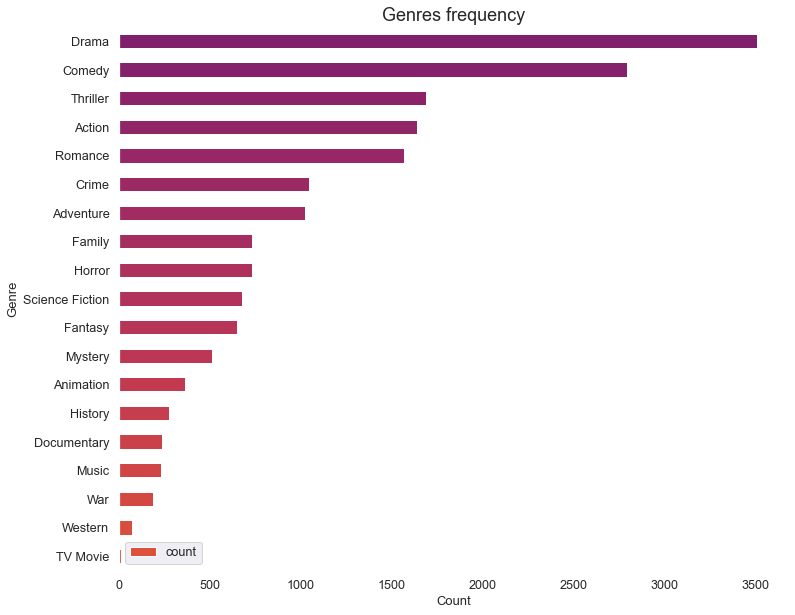

In [41]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

genrestotal.plot(figsize=(12, 10),kind='barh',x='genre',y='count', color=color).set_facecolor('white')
plt.ylabel('Genre', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Genres frequency", fontsize=18)

In [42]:
data.groupby(['genres'], as_index=False)['revenue'].sum()

,genres,revenue
0,Action,1003900713
1,"Action,Adventure",542743163
2,"Action,Adventure,Animation,Drama",11338
3,"Action,Adventure,Animation,Family",631442092
4,"Action,Adventure,Animation,Family,Comedy",631744560
...,...,...
1531,"Western,Documentary",206728
1532,"Western,Drama,Action,Adventure",25052000
1533,"Western,History",18635620
1534,"Western,History,War",25819961


In [43]:
data['genres'] = data['genres'].fillna('None')

In [44]:
gtype = []
revenue = []

for i in data['genres']:
    if i.find('Drama') >= 0: 
        gtype.append('Drama')
        revenue.append(data['revenue'])

In [45]:
gtype

['Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',


In [46]:
revenue

[movie_id
 5           4257354
 6          12136938
 12        940335536
 13        677387716
 14        356296601
             ...    
 118784      1500000
 118957     32500000
 118991        57252
 119123      1040344
 119283     46216641
 Name: revenue, Length: 7339, dtype: int64,
 movie_id
 5           4257354
 6          12136938
 12        940335536
 13        677387716
 14        356296601
             ...    
 118784      1500000
 118957     32500000
 118991        57252
 119123      1040344
 119283     46216641
 Name: revenue, Length: 7339, dtype: int64,
 movie_id
 5           4257354
 6          12136938
 12        940335536
 13        677387716
 14        356296601
             ...    
 118784      1500000
 118957     32500000
 118991        57252
 119123      1040344
 119283     46216641
 Name: revenue, Length: 7339, dtype: int64,
 movie_id
 5           4257354
 6          12136938
 12        940335536
 13        677387716
 14        356296601
             ...    
 118784  

In [47]:
data.genres.unique()

array(['Crime,Comedy', 'Action,Thriller,Crime', 'Animation,Family', ...,
       'Comedy,Animation,Music', 'Animation,Fantasy,Action',
       'Comedy,Action,Crime,Drama'], dtype=object)

In [48]:
# add a pie chart

### column: crew

In [49]:
crew = categoricals.set_index('title')['crew'].str.split(',').explode().rename('crew').reset_index()

In [50]:
crew = crew.groupby('crew')['title'].nunique().sort_values(ascending=False)[:20].sort_values(ascending=True)

In [51]:
crew = pd.DataFrame(crew).rename(columns={"title": "count"}).reset_index()

Text(0.5, 1.0, 'Crew count in movies')

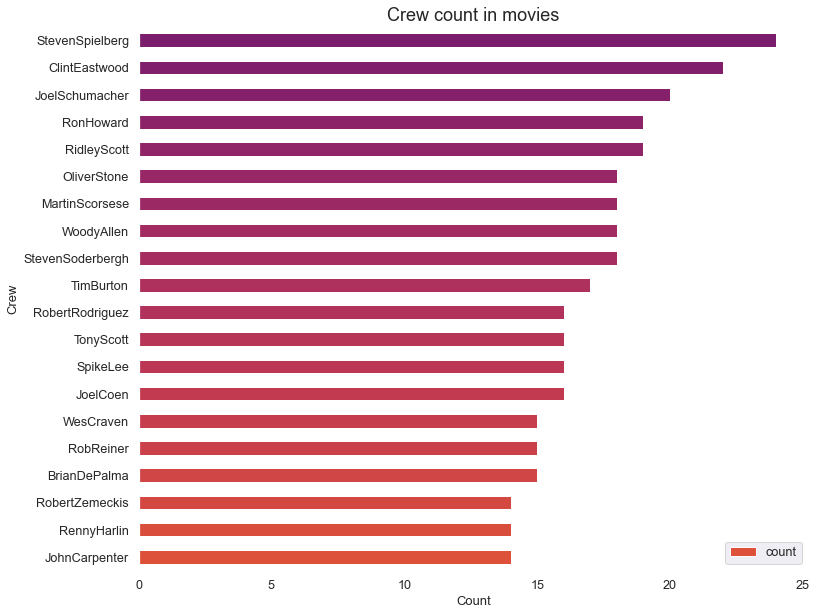

In [52]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

crew.plot(figsize=(12, 10),kind='barh',x='crew',y='count', color=color).set_facecolor('white')
plt.ylabel('Crew', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Crew count in movies", fontsize=18)

In [53]:
crewall = categoricals.set_index('title')['crew'].str.split(',').explode().rename('crew').reset_index()

In [54]:
crewall = crewall.groupby('crew')['title'].nunique().sort_values(ascending=False)

In [55]:
crewall = pd.DataFrame(crewall).rename(columns={"title": "count"}).reset_index()

In [56]:
crewall['count'].sum()

7867

### column: production companies

In [57]:
companies = data.set_index('title')['production_companies'].str.split(',').explode().rename('company').reset_index().dropna()

In [58]:
companies = companies.groupby('company')['title'].nunique().sort_values(ascending=False)[:30].sort_values(ascending=True)

In [59]:
companies = pd.DataFrame(companies).rename(columns={"title": "count"}).reset_index()

Text(0.5, 1.0, 'Production companies movies count')

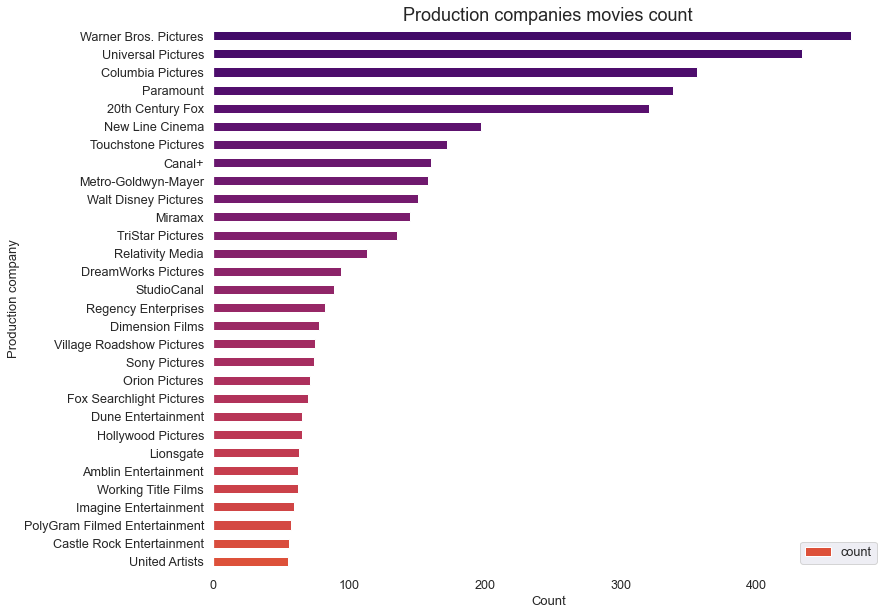

In [60]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

companies.plot(figsize=(12, 10),kind='barh',x='company',y='count', color=color).set_facecolor('white')
plt.ylabel('Production company', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Production companies movies count", fontsize=18)

### column: keywords

In [61]:
keywords = categoricals['keywords'].dropna()

In [62]:
from collections import Counter
topkw = Counter(" ".join(keywords).split(',')).most_common(50)

In [63]:
topkw = pd.DataFrame(topkw)

In [64]:
topkw[:15]

,0,1
0,murder,341
1,based on novel or book,280
2,california,229
3,revenge,220
4,los angeles,194
5,woman director,190
6,friendship,174
7,police,173
8,duringcreditsstinger,171
9,based on a true story,165


### column: overview

In [65]:
overview = categoricals['overview'].dropna()

In [66]:
overview = Counter(" ".join(overview).split(',')).most_common(50)

In [67]:
overview = pd.DataFrame(overview)

In [68]:
overview[:10]

,0,1
0,however,53
1,and,25
2,who,15
3,though,10
4,of course,8
5,England,8
6,love,8
7,but,7
8,family,6
9,N.Y.,5


#### questions 

##### Murder / not murder in keywords: is there difference in revenue?

In [69]:
keywords = data

In [70]:
keywords = keywords.fillna('none')

In [71]:
keywords = pd.DataFrame(keywords)

In [72]:
keywords['keywords'].isnull().sum()

0

In [73]:
murder = keywords[keywords.keywords.str.contains('murder')]

In [74]:
notmurder = keywords[~keywords["keywords"].str.contains('murder')]

In [75]:
murder.shape

(491, 21)

In [76]:
notmurder.shape

(6848, 21)

In [77]:
totalm = murder['revenue'].sum()
totalm

21629587231

In [78]:
totalnotm = notmurder['revenue'].sum()
totalnotm

402716772448

In [79]:
print('Avg revenue films with murder is: ', 21629587231/491)

Avg revenue films with murder is:  44052112.48676171


In [80]:
print('Avg revenue films without murder is: ', 397105904227/6848)

Avg revenue films without murder is:  57988595.82754089


##### christopher nolan deep dive avg revenue

In [81]:
crew = data.fillna('None')

In [82]:
christoper = crew[crew.crew.str.contains('ChristopherNolan')]
christoper.shape

(8, 21)

In [83]:
christoper

,title,overview,release_date,genres,budget,original_language,original_title,popularity,production_companies,production_countries,runtime,spoken_languages,status,vote_average,vote_count,keywords,cast,crew,revenue,release_year,release_month
movie_id,,,,,,,,,,,,,,,,,,,,,
77,Memento,Leonard Shelby is tracking down the man who ra...,2000-10-11,"Mystery,Thriller",9000000,en,Memento,30.320,"Summit Entertainment,Newmarket Capital Group,T...",United States of America,113.0,English,Released,8.2,11570,"insulin,tattoo,waitress,amnesia,drug dealer,mo...",GuyPearce,ChristopherNolan,39723096,2000,10
155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-14,"Drama,Action,Crime,Thriller",185000000,en,The Dark Knight,64.878,"DC Comics,Legendary Pictures,Syncopy,Isobel Gr...","United Kingdom,United States of America",152.0,"English,普通话",Released,8.5,26143,"dc comics,crime fighter,secret identity,anti h...",ChristianBale,ChristopherNolan,1004558444,2008,7
272,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded...",2005-06-10,"Action,Crime,Drama",150000000,en,Batman Begins,52.931,"Warner Bros. Pictures,DC Comics,DC Entertainme...","United Kingdom,United States of America",140.0,"English,اردو,普通话",Released,7.7,16796,"loss of loved one,martial arts,dc comics,crime...",ChristianBale,ChristopherNolan,374218673,2005,6
320,Insomnia,Two Los Angeles homicide detectives are dispat...,2002-05-24,"Crime,Mystery,Thriller",46000000,en,Insomnia,18.955,"Alcon Entertainment,Witt/Thomas Productions,Se...",United States of America,118.0,English,Released,6.9,3519,"hotel,detective,confession,small town,fbi,homi...",AlPacino,ChristopherNolan,113714830,2002,5
1124,The Prestige,A mysterious story of two magicians whose inte...,2006-10-19,"Drama,Mystery,Thriller",40000000,en,The Prestige,32.546,"Touchstone Pictures,Syncopy,Warner Bros. Pictures",United States of America,130.0,English,Released,8.2,12291,"competition,secret,obsession,magic,diary,dying...",ChristianBale,ChristopherNolan,109676311,2006,10
11660,Following,"Bill, an idle, unemployed aspiring writer, wal...",1999-04-02,"Drama,Thriller",6000,en,Following,9.192,Next Wave Films,"United Kingdom,United States of America",68.0,English,Released,7.2,1105,"london, england,aspiring writer,neo-noir,break...",JeremyTheobald,ChristopherNolan,48482,1999,4
27205,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-15,"Action,Science Fiction,Adventure",160000000,en,Inception,155.584,"Legendary Pictures,Syncopy,Warner Bros. Pictures","United Kingdom,United States of America",148.0,"English,日本語",Released,8.3,30176,"paris, france,spy,philosophy,allegory,dream,ki...",LeonardoDiCaprio,ChristopherNolan,825532764,2010,7
49026,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,"Action,Crime,Drama,Thriller",250000000,en,The Dark Knight Rises,97.753,"Syncopy,Legendary Pictures,DC Entertainment,Wa...",United States of America,165.0,English,Released,7.8,18529,"dc comics,crime fighter,terrorist,secret ident...",ChristianBale,ChristopherNolan,1081041287,2012,7


In [84]:
notchristopher = crew[~crew["crew"].str.contains('ChristopherNolan')]
notchristopher.shape

(7331, 21)

In [85]:
totalc = christoper['revenue'].sum()
totalc

3548513887

In [86]:
totalnotc = notchristopher['revenue'].sum()
totalnotc

420797845792

In [87]:
print('Avg revenue films with Christopher Nolan is: ', 3548513887/8)

Avg revenue films with Christopher Nolan is:  443564235.875


In [88]:
print('Avg revenue films without Christopher Nolan is: ', 420797845792/7331)

Avg revenue films without Christopher Nolan is:  57399787.995089345


##### budget per month film

In [89]:
month = data

In [90]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [91]:
budgetxmonths = month.groupby(['release_month']).apply(lambda x: x['budget'].sum()/len(x)).reset_index()

In [92]:
budgetxmonths = pd.DataFrame(budgetxmonths)

In [93]:
budgetxmonths.columns

Index(['release_month', 0], dtype='object')

<Figure size 864x576 with 0 Axes>

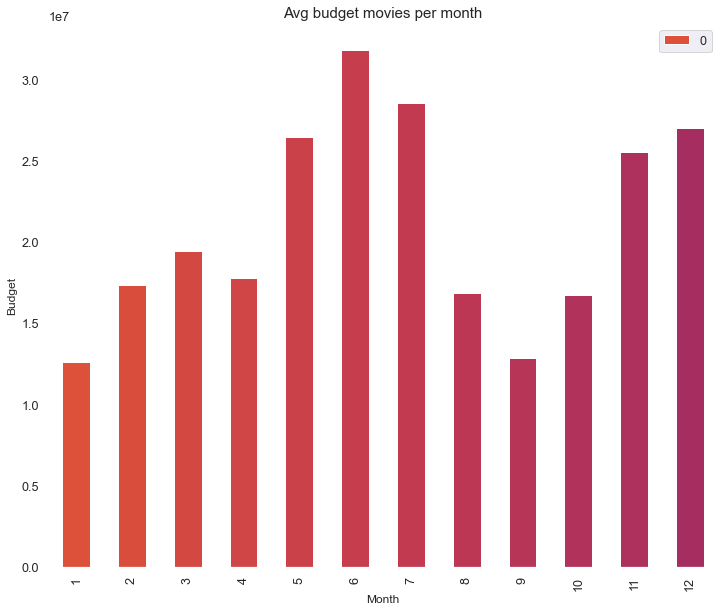

In [94]:
# month plot

plt.figure(figsize=(12,8))
budgetxmonths.plot(figsize=(12, 10),kind='bar',x='release_month',y=0, color=color).set_facecolor('white')
plt.ylabel('Budget', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg budget movies per month", fontsize=15)
plt.show()

##### women in cast: changes over time?

In [95]:
data1 = data[(data['release_date'].dt.year > 2000)]

In [96]:
cast = data1.groupby('cast')['title'].nunique().sort_values(ascending=False)[:20].sort_values(ascending=True)

In [97]:
cast = pd.DataFrame(cast).rename(columns={"title": "movietotal"}).reset_index()

Text(0.5, 1.0, 'Frequency of Movies released by popular cast')

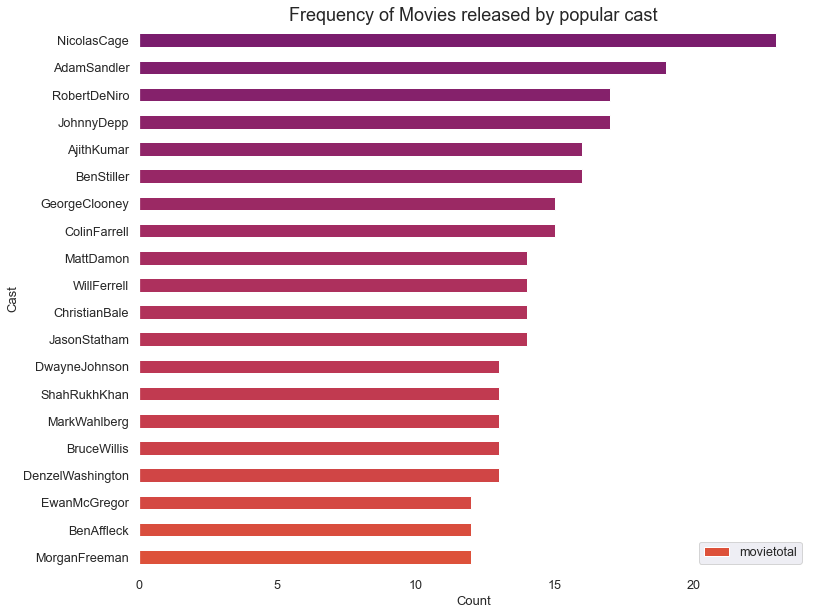

In [98]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

cast.plot(figsize=(12, 10),kind='barh',x='cast',y='movietotal', color=color).set_facecolor('white')
plt.ylabel('Cast', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Frequency of Movies released by popular cast", fontsize=18)

In [100]:
netflix = pd.read_csv('./netflix_titles 2.csv')

In [101]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [141]:
netflixusa = netflix[netflix['country']=='United States']

In [142]:
netflixusa['type'] = netflix[netflix['type']=='Movie']

In [143]:
netflixcast = netflixusa.set_index('show_id')['cast'].str.split(',').explode().rename('cast').reset_index()

In [144]:
netflixcast['cast'] = netflixcast['cast'].dropna()

In [145]:
netflixcast = netflixcast.groupby('cast')['show_id'].nunique().sort_values(ascending=False)[:15].sort_values(ascending=True)

In [146]:
netflixcast = pd.DataFrame(netflixcast).rename(columns={"show_id": "count"}).reset_index()

In [150]:
netflixcast

,cast,count
0,Seth Rogen,11
1,Bobby Cannavale,11
2,Ray Liotta,11
3,Kari Wahlgren,11
4,Nick Swardson,11
5,Peter Facinelli,11
6,Kevin Michael Richardson,11
7,Nicolas Cage,11
8,David Koechner,12
9,Sean Astin,12


Text(0.5, 1.0, 'Crew count in movies')

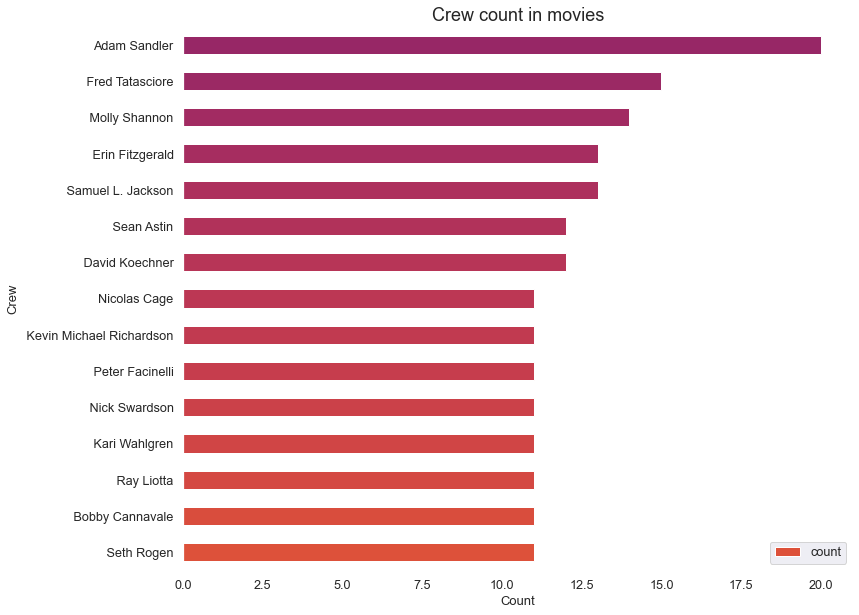

In [148]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

netflixcast.plot(figsize=(12, 10),kind='barh',x='cast',y='count', color=color).set_facecolor('white')
plt.ylabel('Crew', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title("Crew count in movies", fontsize=18)

#### 